In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas as pd
import models as md
sns.set()

## Visual angle time course vs L/V values

[ 131.57894737   65.78947368   44.64285714   33.78378378   26.88172043
   22.52252252]


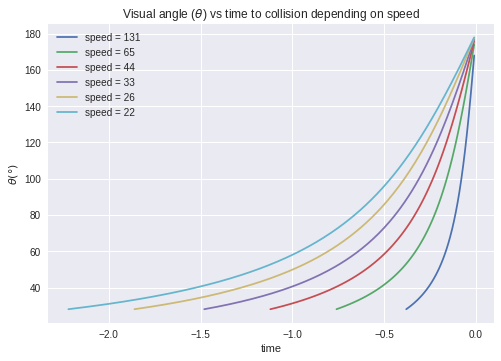

In [2]:
# these values are taken from Bhattacharyya et. al 2017:
LV_vals = np.array([0.19, 0.38, 0.56, 0.74, 0.93, 1.11])
stim_size = 25
speeds = 1/(LV_vals/stim_size)
print(speeds)

#plt.figure(figsize=(8,8))
for speed in speeds:
    t, stims, dists = md.generate_stimulus(stim_size=stim_size, speed=speed, dt=0.01)
    collision_idx = np.argmin(np.abs(dists))
    t_collision = t[collision_idx]
    stim_collision = stims[collision_idx]
    
    before_collision_mask = t<t_collision
    t_to_collision = t[before_collision_mask] - t_collision
    stim_to_collision = stims[before_collision_mask]
    plt.plot(t_to_collision, stim_to_collision, label='speed = ' + str(int(speed)))
plt.xlabel('time')
plt.ylabel(r'$\theta (\degree)$')
plt.title(r'Visual angle ($\theta$) vs time to collision depending on speed')
plt.legend()
#print(dists)

[28.072486935852957, 11.421186274999284]


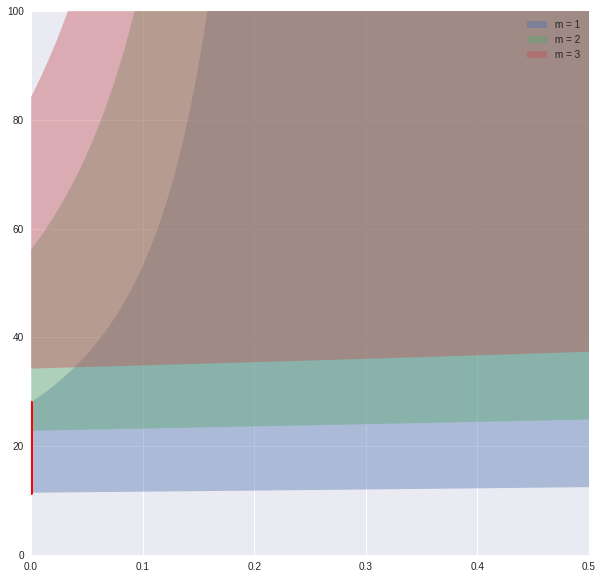

In [3]:
length = 10
dt = 0.001
m = 1.5
b = 0
plt.figure(figsize=(10, 10))

for m, mcolor in zip([1, 2, 3], ['r', 'g', 'b']):
    lv1 = 0.1
    lv2 = 1.2
    stim_size1 = 25
    stim_size2 = 10
    speed1 = 1/(lv1/stim_size1)
    speed2 = 1/(lv2/stim_size2)
    t, stims, tstims1, dists, t_to_collision, transformed_stim_to_collision = md.transform_stim(stim_size1, speed1, length, dt, m, b)
    t, stims, tstims2, dists, t_to_collision, transformed_stim_to_collision = md.transform_stim(stim_size2, speed2, length, dt, m, b)
    #plt.figure()
    plt.fill_between(t, tstims1, tstims2, alpha=0.4, label='m = ' + str(m), lw=4, linestyle='-')
    if m == 1:
        plt.plot([0, 0], [tstims1[0], tstims2[0]], 'r', lw=3)
        print([tstims1[0], tstims2[0]])
    plt.xlim([0, 0.5])
    plt.ylim([0, 100])
    plt.legend()
#plt.plot(t, dists)

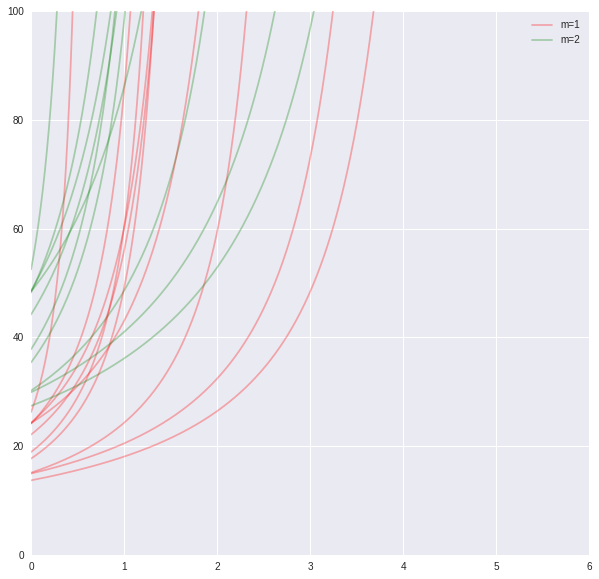

In [4]:
LV_vals = np.array([0.19, 0.38, 0.56, 0.74, 0.93, 1.11])
stim_size = 15
length = 10
dt = 0.001
m = 1
b = 0
critical_angle = 35

speeds = 1/(LV_vals/stim_size)
speed = speeds[3]

lv_list = []
resp_t_list = []
resp_dist_list = []
resp_ttc_list = []

plt.figure(figsize=(10, 10))
for i in range(10):
    lv = np.random.rand()*1.1 + 0.1
    stim_size = np.random.rand()*15 + 10
    speed = 1/(lv/stim_size)
    for m, mcolor in zip([1, 2], ['r', 'g']):
        t, stims, tstims, dists, t_to_collision, transformed_stim_to_collision = md.transform_stim(stim_size, speed, length, dt, m, b)
        
        t_resp_idx = np.argmin(np.abs(tstims - critical_angle))
        lv_list.append(lv)
        resp_t_list.append(t[t_resp_idx])
        resp_ttc_list.append(t_to_collision[t_resp_idx])
        resp_dist_list.append(dists[t_resp_idx])
        
        if i == 0:
            plt.plot(t, tstims, c=mcolor, alpha=0.3, label='m=' + str(m))
        else:
            plt.plot(t, tstims, c=mcolor, alpha=0.3)
plt.xlim([0, 6])
plt.ylim([0, 100])
plt.legend()
#plt.plot(t, dists)

## Response properties for critical angle

In [5]:
def calc_analytic_resp_props(l, lv, d_init, critical_angle):
    v = l/lv
    tan_ca = np.tan((critical_angle/2)/180*np.pi)
    resp_time = d_init/v - l/(2*tan_ca*v)
    resp_dist = d_init - v*resp_time
    
    t_collision = d_init/v
    resp_ttc = resp_time - t_collision
    return resp_time, resp_dist, resp_ttc

In [6]:
d_init = 50
critical_angle = 35
l = 25
analytic_lvs = np.arange(0.1, 1.2, step=0.01)
analytic_resp_times, analytic_resp_dists, analytic_resp_ttcs = calc_analytic_resp_props(l, analytic_lvs, d_init, critical_angle)

In [7]:
stim_size = 15
length = 10
dt = 0.0001
m = 1
b = 0
critical_angle = 35

lv_list = []
stim_size_list = []
resp_t_list = []
resp_dist_list = []
resp_ttc_list = []

for i in range(1000):
    lv = np.random.rand()*1.1 + 0.1
    stim_size = np.random.rand()*15 + 10
    speed = 1/(lv/stim_size)
    m=1
    t, stims, tstims, dists, t_to_collision, transformed_stim_to_collision = md.transform_stim(stim_size, speed, length, dt, m, b)

    t_resp_idx = np.argmin(np.abs(tstims - critical_angle))
    lv_list.append(lv)
    stim_size_list.append(stim_size)
    resp_t_list.append(t[t_resp_idx])
    resp_ttc_list.append(t_to_collision[t_resp_idx])
    resp_dist_list.append(dists[t_resp_idx])

In [8]:
lvs = np.array(lv_list)
stim_sizes = np.array(stim_size_list)
resp_times = np.array(resp_t_list)
resp_ttcs = np.array(resp_ttc_list)
resp_dists = np.array(resp_dist_list)

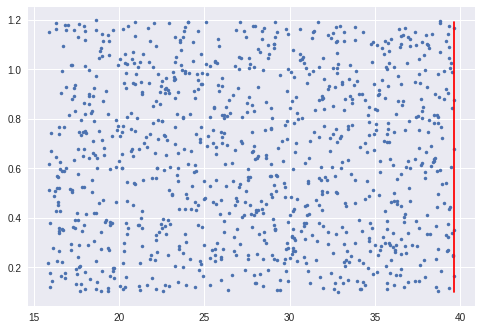

In [9]:
vmin = np.min(stim_sizes)
vmax = np.max(stim_sizes)
sm = plt.cm.ScalarMappable(cmap=mpl.cm.viridis, norm=mpl.colors.Normalize(vmin=vmin, vmax=vmax))
plt.plot(resp_dists, lvs, '.', )
plt.plot(analytic_resp_dists, analytic_lvs, 'r')

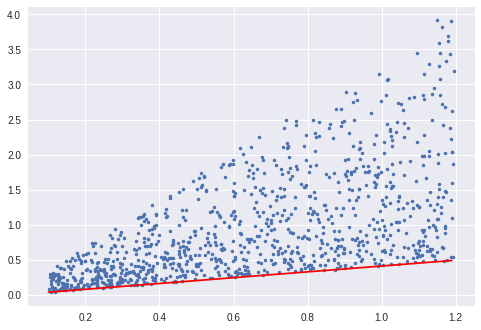

In [10]:
plt.plot(lvs, resp_times, '.')
plt.plot(analytic_lvs, analytic_resp_times, 'r')

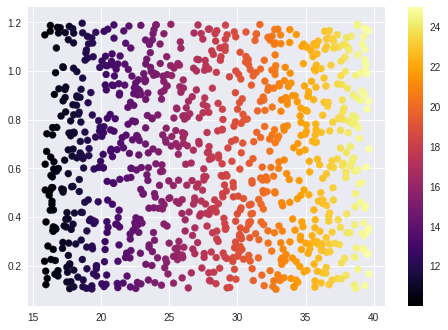

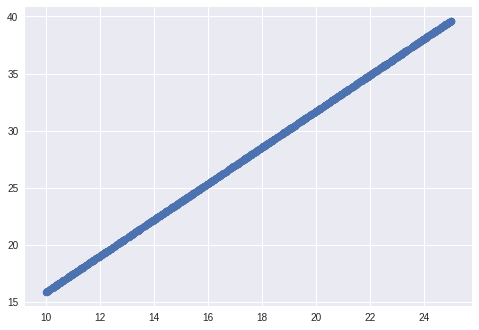

In [11]:
vmin = np.min(stim_sizes)
vmax = np.max(stim_sizes)
sm = plt.cm.ScalarMappable(cmap=mpl.cm.inferno, norm=mpl.colors.Normalize(vmin=vmin, vmax=vmax))
plt.scatter(resp_dists, lvs, c=sm.to_rgba(stim_sizes))
sm.set_array([])
plt.colorbar(sm)

plt.figure()
plt.scatter(stim_sizes, resp_dists)

In [12]:
mpl.rcParamsDefault

RcParams({'_internal.classic_mode': False,
          'agg.path.chunksize': 0,
          'animation.avconv_args': [],
          'animation.avconv_path': 'avconv',
          'animation.bitrate': -1,
          'animation.codec': 'h264',
          'animation.convert_args': [],
          'animation.convert_path': 'convert',
          'animation.embed_limit': 20.0,
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.html_args': [],
          'animation.mencoder_args': [],
          'animation.mencoder_path': 'mencoder',
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'data',
          'axes.axisbelow': 'line',
          'axes.edgecolor': 'k',
          'axes.facecolor': 'w',
          'axes.formatter.limits': [-7, 7],
          'axes.formatter.min_exponent': 0,
          'axes.formatter.offset_threshold': 4,
          'axes.formatter.use

## Response angle for noiseless, stationary model

In [13]:
def stationary_response_angle(vt, el, rm, rho_null, c_scale, c_rho, m, b):
    resp_angle = (vt - el + rho_null)/(c_scale * m * (rm - c_rho)) - b/m
    return resp_angle

(0, 180)

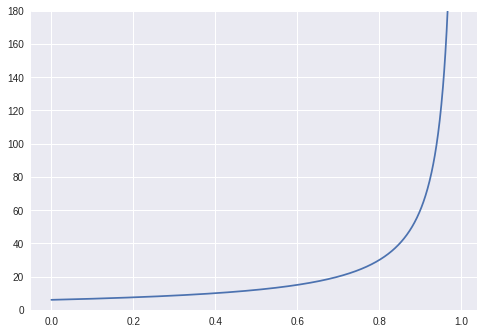

In [14]:
vt = -0.061
el = -0.079
rm = 1
c_scale = 3*1e-3
b = 0

m = 1
rho_null = 0
c_rho = 1 * np.linspace(0, 0.99, num=1000)

resp_angles = stationary_response_angle(vt, el, rm, rho_null, c_scale, c_rho, m, b)

plt.plot(c_rho, resp_angles)
plt.ylim([0, 180])

(0, 180)

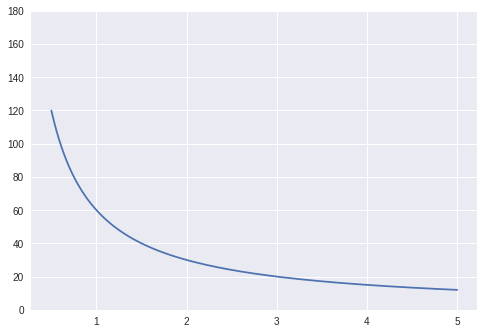

In [15]:
vt = -0.061
el = -0.079
rm = 1e7
c_scale = 3*1e-10
b = 0

m = np.linspace(0.5, 5, num=1000)
rho_null = 0
c_rho = 1e7 * 0.9

resp_angles = stationary_response_angle(vt, el, rm, rho_null, c_scale, c_rho, m, b)

plt.plot(m, resp_angles)
plt.ylim([0, 180])

(0, 180)

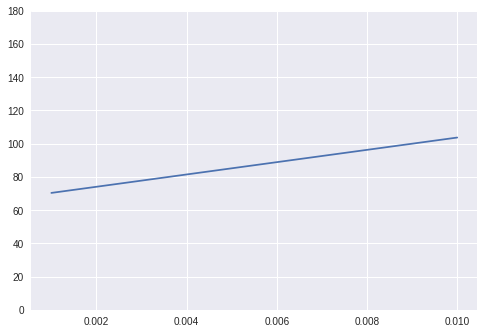

In [16]:
vt = -0.061
el = -0.079
rm = 1e7
c_scale = 3*1e-10
b = 0

m = 1
rho_null = np.linspace(0.001, 0.010, num=1000)
c_rho = 1e7 * 0.91

resp_angles = stationary_response_angle(vt, el, rm, rho_null, c_scale, c_rho, m, b)

plt.plot(rho_null, resp_angles)
plt.ylim([0, 180])


## Response angle for noisy, stationary model

In [18]:
def noisy_response_angle(vt, el, rm, rho_null, c_scale, c_rho, m, b, std_m, std_rho, std_vt):
    eta_m = np.random.normal(loc=0.0, scale=std_m, )
    resp_angle = (vt - el + rho_null)/(c_scale * m * (rm - c_rho)) - b/m
    return resp_angle

In [19]:
params = {'tau_m': 0.023,
          'e_l': -0.079,
          'r_m': 10*1e6,
          'v_t': -0.061,
          'init_vm_std': 0.001,
          'vt_std': 0.000,
          'rho_null': 0,
          'rho_null_std': 1,
          'tau_inh': 0.001,
          'rho_scale': 9.0*1e6,
          'exc_scale': 30,
          'dt': 0.0001,
          'total_time': 5,
          'init_period': 0,
          'noise_std_exc': 1*1e-3,
          'noise_std_inh': 1*1e-3,
          'cutoff_angle': 180,
          'm': 1,
          'b': 0,
          'lv_min': 0.1,
          'lv_max': 1.2,
          'l_min': 10,
          'l_max': 25,
          'init_distance': 50}

nruns = 1000
rstims = np.zeros(nruns)
rdists = np.zeros(nruns)
reaction_times = np.zeros(nruns)
speeds = np.zeros(nruns)
for i in np.arange(nruns):
    rstims[i], rdists[i], reaction_times[i], lv, stim_size, speeds[i], resp_in_t_to_coll = md.calc_response_fully_stationary(params)
    
analytical_resp_angle = stationary_response_angle(params['v_t'], params['e_l'], params['r_m'], params['rho_null']*1e-3,
                                                   params['exc_scale']*1e-11, params['rho_scale'], params['m'],
                                                   params['b'])

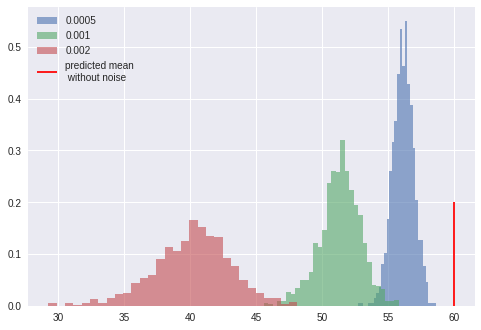

In [21]:
params = {'tau_m': 0.023,
          'e_l': -0.079,
          'r_m': 10*1e6,
          'v_t': -0.061,
          'init_vm_std': 0.001,
          'vt_std': 0.000,
          'rho_null': 0,
          'rho_null_std': 1,
          'tau_inh': 0.001,
          'rho_scale': 9.0*1e6,
          'exc_scale': 30,
          'dt': 0.0001,
          'total_time': 5,
          'init_period': 0,
          'noise_std_exc': 0*1e-3,
          'noise_std_inh': 0*1e-3,
          'cutoff_angle': 180,
          'm': 1,
          'b': 0,
          'lv_min': 0.1,
          'lv_max': 1.2,
          'l_min': 10,
          'l_max': 25,
          'init_distance': 50}

for exc_std in [0.0005, 0.001, 0.002]:
    nruns = 1000
    rstims = np.zeros(nruns)
    rdists = np.zeros(nruns)
    reaction_times = np.zeros(nruns)
    speeds = np.zeros(nruns)
    for i in np.arange(nruns):
        params['noise_std_exc'] = exc_std
        rstims[i], rdists[i], reaction_times[i], lv, stim_size, speeds[i], resp_in_t_to_coll = md.calc_response_fully_stationary(params)

    analytical_resp_angle = stationary_response_angle(params['v_t'], params['e_l'], params['r_m'], params['rho_null']*1e-3,
                                                       params['exc_scale']*1e-11, params['rho_scale'], params['m'],
                                                       params['b'])

    plt.hist(rstims, bins=30, label=str(exc_std), density=True, alpha=0.6)
plt.vlines(analytical_resp_angle, 0, .2, 'r', label='predicted mean\n without noise')
plt.legend()

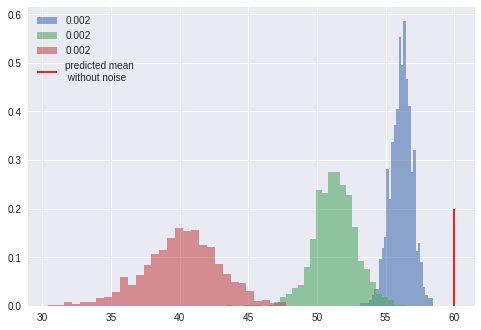

In [23]:
params = {'tau_m': 0.023,
          'e_l': -0.079,
          'r_m': 10*1e6,
          'v_t': -0.061,
          'init_vm_std': 0.001,
          'vt_std': 0.000,
          'rho_null': 0,
          'rho_null_std': 1,
          'tau_inh': 0.001,
          'rho_scale': 9.0*1e6,
          'exc_scale': 30,
          'dt': 0.0001,
          'total_time': 5,
          'init_period': 0,
          'noise_std_exc': 0*1e-3,
          'noise_std_inh': 0*1e-3,
          'cutoff_angle': 180,
          'm': 1,
          'b': 0,
          'lv_min': 0.1,
          'lv_max': 1.2,
          'l_min': 10,
          'l_max': 25,
          'init_distance': 50}

for inh_std in [0.0005, 0.001, 0.002]:
    nruns = 1000
    rstims = np.zeros(nruns)
    rdists = np.zeros(nruns)
    reaction_times = np.zeros(nruns)
    speeds = np.zeros(nruns)
    for i in np.arange(nruns):
        params['noise_std_inh'] = inh_std
        rstims[i], rdists[i], reaction_times[i], lv, stim_size, speeds[i], resp_in_t_to_coll = md.calc_response_fully_stationary(params)

    analytical_resp_angle = stationary_response_angle(params['v_t'], params['e_l'], params['r_m'], params['rho_null']*1e-3,
                                                       params['exc_scale']*1e-11, params['rho_scale'], params['m'],
                                                       params['b'])

    plt.hist(rstims, bins=30, label=str(exc_std), density=True, alpha=0.6)
plt.vlines(analytical_resp_angle, 0, .2, 'r', label='predicted mean\n without noise')
plt.legend()

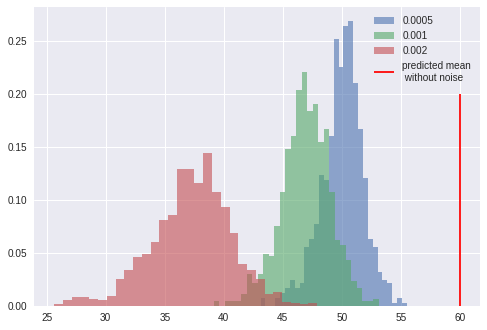

In [25]:
params = {'tau_m': 0.023,
          'e_l': -0.079,
          'r_m': 10*1e6,
          'v_t': -0.061,
          'init_vm_std': 0.001,
          'vt_std': 0.000,
          'rho_null': 0,
          'rho_null_std': 1,
          'tau_inh': 0.001,
          'rho_scale': 9.0*1e6,
          'exc_scale': 30,
          'dt': 0.0001,
          'total_time': 5,
          'init_period': 0,
          'noise_std_exc': 0*1e-3,
          'noise_std_inh': 1*1e-3,
          'cutoff_angle': 180,
          'm': 1,
          'b': 0,
          'lv_min': 0.1,
          'lv_max': 1.2,
          'l_min': 10,
          'l_max': 25,
          'init_distance': 50}

for exc_std in [0.0005, 0.001, 0.002]:
    nruns = 1000
    rstims = np.zeros(nruns)
    rdists = np.zeros(nruns)
    reaction_times = np.zeros(nruns)
    speeds = np.zeros(nruns)
    for i in np.arange(nruns):
        params['noise_std_exc'] = exc_std
        rstims[i], rdists[i], reaction_times[i], lv, stim_size, speeds[i], resp_in_t_to_coll = md.calc_response_fully_stationary(params)

    analytical_resp_angle = stationary_response_angle(params['v_t'], params['e_l'], params['r_m'], params['rho_null']*1e-3,
                                                       params['exc_scale']*1e-11, params['rho_scale'], params['m'],
                                                       params['b'])

    plt.hist(rstims, bins=30, label=str(exc_std), density=True, alpha=0.6)
plt.vlines(analytical_resp_angle, 0, .2, 'r', label='predicted mean\n without noise')
plt.legend()

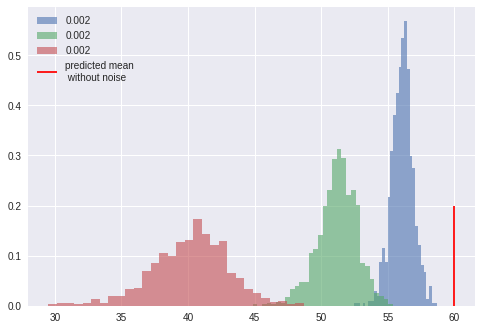

In [26]:
params = {'tau_m': 0.023,
          'e_l': -0.079,
          'r_m': 10*1e6,
          'v_t': -0.061,
          'init_vm_std': 0.001,
          'vt_std': 0.000,
          'rho_null': 0,
          'rho_null_std': 1,
          'tau_inh': 0.001,
          'rho_scale': 9.0*1e6,
          'exc_scale': 30,
          'dt': 0.0001,
          'total_time': 5,
          'init_period': 0,
          'noise_std_exc': 0*1e-3,
          'noise_std_inh': 0*1e-3,
          'cutoff_angle': 180,
          'm': 1,
          'b': 0,
          'lv_min': 0.1,
          'lv_max': 1.2,
          'l_min': 10,
          'l_max': 25,
          'init_distance': 50}

for vt_std in [0.0005, 0.001, 0.002]:
    nruns = 1000
    rstims = np.zeros(nruns)
    rdists = np.zeros(nruns)
    reaction_times = np.zeros(nruns)
    speeds = np.zeros(nruns)
    for i in np.arange(nruns):
        params['vt_std'] = vt_std
        rstims[i], rdists[i], reaction_times[i], lv, stim_size, speeds[i], resp_in_t_to_coll = md.calc_response_fully_stationary(params)

    analytical_resp_angle = stationary_response_angle(params['v_t'], params['e_l'], params['r_m'], params['rho_null']*1e-3,
                                                       params['exc_scale']*1e-11, params['rho_scale'], params['m'],
                                                       params['b'])

    plt.hist(rstims, bins=30, label=str(vt_std), density=True, alpha=0.6)
plt.vlines(analytical_resp_angle, 0, .2, 'r', label='predicted mean\n without noise')
plt.legend()

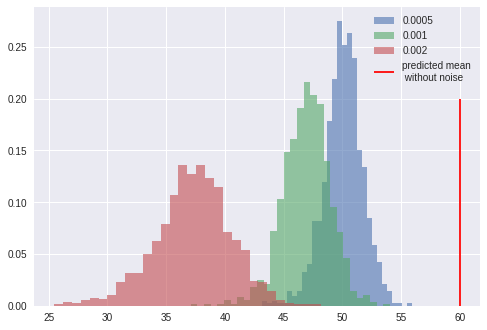

In [27]:
params = {'tau_m': 0.023,
          'e_l': -0.079,
          'r_m': 10*1e6,
          'v_t': -0.061,
          'init_vm_std': 0.001,
          'vt_std': 0.000,
          'rho_null': 0,
          'rho_null_std': 1,
          'tau_inh': 0.001,
          'rho_scale': 9.0*1e6,
          'exc_scale': 30,
          'dt': 0.0001,
          'total_time': 5,
          'init_period': 0,
          'noise_std_exc': 1*1e-3,
          'noise_std_inh': 0*1e-3,
          'cutoff_angle': 180,
          'm': 1,
          'b': 0,
          'lv_min': 0.1,
          'lv_max': 1.2,
          'l_min': 10,
          'l_max': 25,
          'init_distance': 50}

for vt_std in [0.0005, 0.001, 0.002]:
    nruns = 1000
    rstims = np.zeros(nruns)
    rdists = np.zeros(nruns)
    reaction_times = np.zeros(nruns)
    speeds = np.zeros(nruns)
    for i in np.arange(nruns):
        params['vt_std'] = vt_std
        rstims[i], rdists[i], reaction_times[i], lv, stim_size, speeds[i], resp_in_t_to_coll = md.calc_response_fully_stationary(params)

    analytical_resp_angle = stationary_response_angle(params['v_t'], params['e_l'], params['r_m'], params['rho_null']*1e-3,
                                                       params['exc_scale']*1e-11, params['rho_scale'], params['m'],
                                                       params['b'])

    plt.hist(rstims, bins=30, label=str(vt_std), density=True, alpha=0.6)
plt.vlines(analytical_resp_angle, 0, .2, 'r', label='predicted mean\n without noise')
plt.legend()